# **Importing Libraries & Basic Information**

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import zscore

Reading the training and test data using the pandas data frame.

In [ ]:
df1 = pd.read_csv("/kaggle/input/titanic/train.csv")
df2 = pd.read_csv("/kaggle/input/titanic/test.csv")

In [ ]:
# df1 = pd.read_csv('/content/drive/MyDrive/titanic/t_train.csv') #train dataset
# df2 = pd.read_csv('/content/drive/MyDrive/titanic/t_test.csv') #test dataset

In [ ]:
df1.shape

(891, 12)

In [ ]:
df2.shape

(418, 11)

In [ ]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Check for missing values.

In [ ]:
df1.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


# **Data Visualization**

Visualizing the number of survivors and death counts.

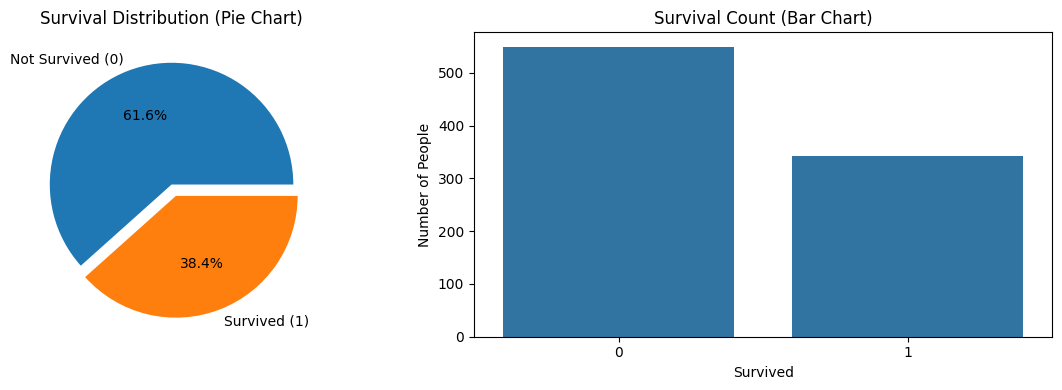

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot1: Pie chart for survival distribution
survival_counts = df1['Survived'].value_counts()
survival_counts.plot.pie(
    labels=['Not Survived (0)', 'Survived (1)'],
    autopct='%1.1f%%',
    explode=[0, 0.1],
    ax=axes[0],
)
axes[0].set_title('Survival Distribution (Pie Chart)')
axes[0].set_ylabel('')  # Remove y-axis label

# Plot 2: Bar chart for survival count
sns.countplot(x='Survived', data=df1, ax=axes[1])
axes[1].set_title('Survival Count (Bar Chart)') #0 = dead, 1 = survived
axes[1].set_ylabel('Number of People')

# Show the plot
plt.tight_layout()
plt.show()


Check how the gender of passengers influenced their chances of survival.

In [ ]:
gender_counts = df1['Sex'].value_counts()
print("Number of passengers by gender:")
print(gender_counts)

Number of passengers by gender:
Sex
male      577
female    314
Name: count, dtype: int64


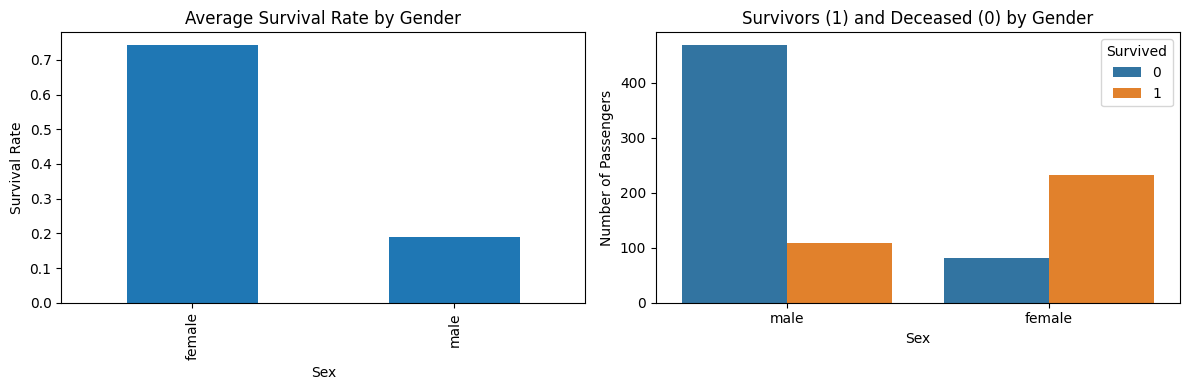

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot 1: Average survival rate for each gender (0 = died, 1 = survived)
survival_rate_by_sex = df1.groupby('Sex')['Survived'].mean()
survival_rate_by_sex.plot(kind='bar', ax=axes[0])
axes[0].set_title('Average Survival Rate by Gender')
axes[0].set_ylabel('Survival Rate')

# Plot 2: Count of survivors and deceased by gender
sns.countplot(x='Sex', hue='Survived', data=df1, ax=axes[1])
axes[1].set_title('Survivors (1) and Deceased (0) by Gender')
axes[1].set_ylabel('Number of Passengers')

# Show both plots
plt.tight_layout()
plt.show()

# **Feature Engineering**

In [ ]:
# replacing the missing values in the Embarked feature with S
df1 = df1.fillna({"Embarked": "S"})

In [ ]:
df1["Age"] = df1["Age"].fillna(-0.5)
df2["Age"] = df2["Age"].fillna(-0.5) # Fill missing age values with -0.5 so we can mark them as 'Unknown'

bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager',
          'Student', 'Young Adult', 'Adult', 'Senior']


# Create a new column 'AgeGroup' in train and test data
df1['AgeGroup'] = pd.cut(df1["Age"], bins, labels=labels)
df2['AgeGroup'] = pd.cut(df2["Age"], bins, labels=labels)

In [ ]:
df1.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young Adult
5,6,0,3,"Moran, Mr. James",male,-0.5,0,0,330877,8.4583,NaN,Q,Unknown
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Adult
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Baby
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Young Adult
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Teenager


In [ ]:
# Combine train and test datasets into a list
combine = [df1, df2]

# Step 1: Extract title from the Name column
for dataset in combine:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False) # Pull out the word that ends with a period (e.g., "Mr.", "Miss.")


In [ ]:
# Step 2: Replace rare or similar titles with common groups
for dataset in combine:
    # Replace rare titles with 'Rare'
    rare_titles = ['Lady', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona']
    dataset['Title'] = dataset['Title'].replace(rare_titles, 'Rare')

    # Group aristocratic titles into 'Royal'
    royal_titles = ['Countess', 'Lady', 'Sir']
    dataset['Title'] = dataset['Title'].replace(royal_titles, 'Royal')

    # Standardize similar titles
    dataset['Title'] = dataset['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})

df1[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

# Step 3: Map text titles to numbers
title_mapping = {
    "Mr": 1,
    "Miss": 2,
    "Mrs": 3,
    "Master": 4,
    "Royal": 5,
    "Rare": 6
}


for dataset in combine:
    # Convert titles to numbers
    dataset['Title'] = dataset['Title'].map(title_mapping)
    # Fill in any missing values with 0
    dataset['Title'] = dataset['Title'].fillna(0)


In [ ]:
df1.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Student,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young Adult,1
5,6,0,3,"Moran, Mr. James",male,-0.5,0,0,330877,8.4583,NaN,Q,Unknown,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Adult,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Baby,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Young Adult,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Teenager,3


Using the title information, fill in the missing age values.

In [ ]:
mr_age = df1[df1["Title"] == 1]["AgeGroup"].mode()  # Young Adult

miss_age = df1[df1["Title"] == 2]["AgeGroup"].mode()  # Student

mrs_age = df1[df1["Title"] == 3]["AgeGroup"].mode()  # Adult

master_age = df1[df1["Title"] == 4]["AgeGroup"].mode()  # Baby

royal_age = df1[df1["Title"] == 5]["AgeGroup"].mode()  # Adult

rare_age = df1[df1["Title"] == 6]["AgeGroup"].mode()  # Adult

age_title_mapping = {1: "Young Adult", 2: "Student",
                     3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}

for x in range(len(df1["AgeGroup"])):
    if df1["AgeGroup"][x] == "Unknown":
        df1["AgeGroup"][x] = age_title_mapping[df1["Title"][x]]

for x in range(len(df2["AgeGroup"])):
    if df2["AgeGroup"][x] == "Unknown":
        df2["AgeGroup"][x] = age_title_mapping[df2["Title"][x]]

/tmp/ipython-input-32-419194480.py:18: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df1["AgeGroup"][x] = age_title_mapping[df1["Title"][x]]
/tmp/ipython-input-32-419194480.py:22: FutureWarning: ChainedAssignmentError: behaviour will change 

Now assigning a numerical value to each age category. As the age is mapped into different categories we do not need the age feature. Hence drop it.

In [ ]:
# map each Age value to a numerical value
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3,
               'Student': 4, 'Young Adult': 5, 'Adult': 6,
               'Senior': 7}
df1['AgeGroup'] = df1['AgeGroup'].map(age_mapping)
df2['AgeGroup'] = df2['AgeGroup'].map(age_mapping)

df1.head()

# dropping the Age feature for now, might change
df1 = df1.drop(['Age'], axis=1)
df2 = df2.drop(['Age'], axis=1)

In [ ]:
df1.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


Assign numerical values to sex and embarks categories.

In [ ]:
sex_mapping = {"male": 0, "female": 1}
df1['Sex'] = df1['Sex'].map(sex_mapping)
df2['Sex'] = df2['Sex'].map(sex_mapping)

embarked_mapping = {"S": 1, "C": 2, "Q": 3}
df1['Embarked'] = df1['Embarked'].map(embarked_mapping)
df2['Embarked'] = df2['Embarked'].map(embarked_mapping)

In [ ]:
# Step 1: Fill missing Fare in df2 set based on passenger class (Pclass)

for i in range(len(df2)):
    if pd.isnull(df2.loc[i, "Fare"]):  # If Fare is missing
        passenger_class = df2.loc[i, "Pclass"]  # Get the passenger's class

        # Find average Fare for that class in df1ing data and round it
        avg_fare = df1[df1["Pclass"] == passenger_class]["Fare"].mean()
        df2.loc[i, "Fare"] = round(avg_fare, 4)

# Step 2: Divide Fare into 4 equal-sized groups using qcut (quartile-based cut)
# Labels 1 (lowest) to 4 (highest fare group)

df1["FareBand"] = pd.qcut(df1["Fare"], 4, labels=[1, 2, 3, 4])
df2["FareBand"] = pd.qcut(df2["Fare"], 4, labels=[1, 2, 3, 4])

In [ ]:
df2.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,418
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,327
Embarked,418


Drop all the columns having categorical values.

In [ ]:
df1 = df1.drop(['Cabin'], axis=1)
df2 = df2.drop(['Cabin'], axis=1)
df1 = df1.drop(['Ticket'], axis=1)
df2 = df2.drop(['Ticket'], axis=1)
df1 = df1.drop(['Name'], axis=1)
df2 = df2.drop(['Name'], axis=1)
df1 = df1.drop(['Fare'], axis=1)
df2 = df2.drop(['Fare'], axis=1)

KeyError: "['Ticket'] not found in axis"

In [ ]:
df1.head(10)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,Title,FareBand
0,1,0,3,NaN,1,0,NaN,4.0,1,1
1,2,1,1,NaN,1,0,NaN,6.0,3,4
2,3,1,3,NaN,0,0,NaN,5.0,2,2
3,4,1,1,NaN,1,0,NaN,5.0,3,4
4,5,0,3,NaN,0,0,NaN,5.0,1,2
5,6,0,3,NaN,0,0,NaN,5.0,1,2
6,7,0,1,NaN,0,0,NaN,6.0,1,4
7,8,0,3,NaN,3,1,NaN,1.0,4,3
8,9,1,3,NaN,0,2,NaN,5.0,3,2
9,10,1,2,NaN,1,0,NaN,3.0,3,3


# **Model Training**

Dividing the dataset into 80% training set and 20% testing set using train_test_split() from the sklearn library.

In [ ]:
from sklearn.model_selection import train_test_split

# Drop the Survived and PassengerId column from the trainset
predictors = df1.drop(['Survived', 'PassengerId'], axis=1)
target = df1["Survived"]
x_train, x_val, y_train, y_val = train_test_split(
    predictors, target, test_size=0.2, random_state=0)

Using the Random Forest algorithm here. It is known for its robustness and ability to handle diverse data.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

randomforest = RandomForestClassifier()

# Fit the training data along with its output
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)

# Find the accuracy score of the model
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

83.8


We got an accuracy of 83.8%.

# **Prediction on Test Data**

We will use the trained Random Forest model to make predictions on the test dataset.

In [ ]:
ids = df2['PassengerId']
predictions = randomforest.predict(df2.drop('PassengerId', axis=1))

# set the output as a dataframe and convert to csv file named resultfile.csv
output = pd.DataFrame({'PassengerId': ids, 'Survived': predictions})
output.to_csv('resultfile.csv', index=False)

In [ ]:
pred = pd.read_csv('resultfile.csv')
pred.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0


hence, we successfully built a Random Forest classifier to predict the survival chances of Titanic passengers. Through data preprocessing, feature engineering, imputation, and model training, we were able to create a robust model with 83.8% accuracy on the training set.